In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Statistics Exercise
## Statistical Distributions. Properties of distributions. Applications of Probability and Statistics in Computer Science

### Problem 1. Plotting a Single Distribution. Digits in $\pi$ and $e$
We expect that the decimal digits in $\pi$ and $e$ will be randomly distributed and there's no reason for any digit to dominate over others. Let's verify this.

Using an algorithm, the first 10 004 digits of $\pi$ and $e$ were generated:
$$
\pi = 3.(141592 \dots 5678)5667
$$
$$
e = 2.(718281 \dots 6788)5674
$$

The 10 000 digits in brackets were counted. You can see the results in `digits.dat`. Each column corresponds to one digit from 0 to 9. The first row is for $\pi$ and the second row is for $e$.

How are these digits distributed? Are the two distributions different?

**Note:** The dataset is **not properly formatted** to work easily. You can transpose it. Now, digit counts will be in rows and variables - in columns. 
```python
digits = pd.read_table("digits.dat", header = None).T
```

You can also specify column names like this:
```python
digits.columns = ["pi", "e"]
```

Also note that **we are not creating the histogram of the distribution**. We already have the counts, we need to plot them. In a sense, the histogram has already been calculated.

To do this, we can create a "bar chart" (using `plt.bar()`). We have to provide values for the x-axis and y-axis. For the x-axis, we have the numbers 0 through 9 (we can use the *index* of the dataset like this: `digits.index`). For the y-axis, we need to plot the digit counts directly.

We can see that even the simplest datasets sometimes need a bit of preprocessing. This is always the case when we're working with data.

In [11]:
digits = pd.read_table('data\digits.dat', header = None)
digits = digits.T
digits.columns = ['pi', 'e']
digits

,pi,e
0,968,974
1,1026,989
2,1021,1004
3,974,1008
4,1012,982
5,1046,992
6,1021,1079
7,970,1008
8,948,996
9,1014,968


In [31]:
mean_count_pi = digits['pi'].mean()
mean_count_pi

1000.0

In [50]:
def plot_digits(digits, column, number_name, color_bar, color_line):
    mean_number = column.mean()
    plt.bar(digits.index, column, color = color_bar)
    plt.axhline(mean_number, color = color_line, label = 'Mean')

    plt.xlabel('Digit')
    plt.ylabel('Count')
    plt.xticks(digits.index, digits.index)
    plt.title(f'Distribution of digits in {number_name}')
    plt.legend(loc = 'lower right')
    # plt.show()

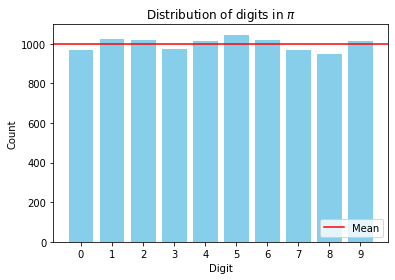

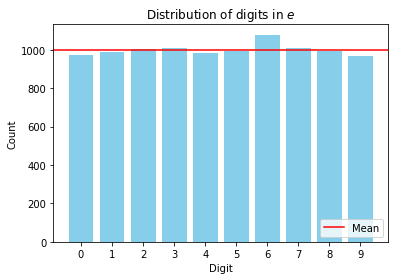

In [58]:
plot_digits(digits, digits['pi'], '$\pi$', 'skyblue', 'red')
plt.show()
plot_digits(digits, digits['e'], '$e$', 'skyblue', 'red')
plt.show()

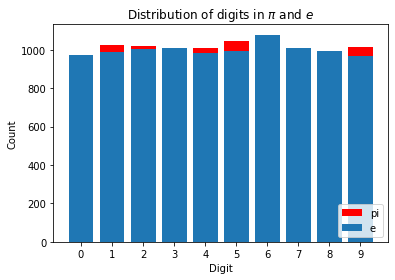

In [67]:
plt.bar(digits.index, digits.pi,label = "pi", color = "red")
plt.bar(digits.index, digits.e,label = "e")

plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(digits.index, digits.index)
plt.title(f'Distribution of digits in $\pi$ and $e$')
plt.legend(loc = 'lower right')
plt.show()

Let's try something else. Scientists have measured the percentage of silica ($\text{SiO}_2$, sand / glass) for 22 meteors. You can find it in `silica.dat`. How are these distributed? What is a "typical" percentage? Is there such percentage at all?

Print the mean, standard deviation (you can use the biased or unbiased formula), skewness and kurtosis of the distribution. What do these numbers tell you? How do they relate to the shape of the distribution? Can you characterize the distribution better? (An idea would be to characterize different parts of it on their own, as if they're different distributions.)

In [123]:
silica_data = pd.read_table('data/silica.dat', header = None)
silica_data.columns = ['context']
silica_data

,context
0,20.77
1,22.56
2,22.71
3,22.99
4,26.39
5,27.08
6,27.32
7,27.33
8,27.57
9,27.81


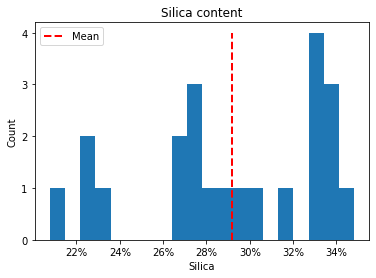

In [127]:
plt.hist(silica_data['context'], bins = 20)
plt.vlines(silica_data['context'].mean(),0,4,color = "red", linewidth = 2, linestyle = "dashed", label = "Mean")

plt.xticks(range(22, 36, 2), [str(num) + '%' for num in list(range(22, 36, 2))])
plt.yticks(range(5), range(5))
plt.xlabel('Silica')
plt.ylabel('Count')
plt.title(f'Silica content')
plt.legend(loc = 'upper left')
plt.show()

In [129]:
silica_data = silica_data['context']
print('Mean: ', silica_data.mean()) 
print('Standard Deviation: ', silica_data.std())
print('Numpy Standard Deviation: ', np.std(silica_data, ddof = 1))
print('Skewness: ', silica_data.skew())
print('Kurtosis: ', silica_data.kurtosis())

Mean:  29.165000000000006
Standard Deviation:  4.29153513436903
Numpy Standard Deviation:  4.29153513436903
Skewness:  -0.44644211385029625
Kurtosis:  -0.9242970726953743


### Problem 2. Categorical Variables. Comparing Categories
In addition to numeric variables (like age and salary), in statistics we also use **categorical variables**. These are descriptions of quality (as opposed to quantity). Such variables can be gender, smoker / non-smoker, results of a medical study (healthy / not healthy), colors (red, green, blue), etc. To plot values of categories, we use *bar charts*. Since category names can be long, it's sometimes useful to plot the lines horizontally.

<p style="color: #d9534f"><strong>There is a very significant difference between histograms and bar charts. Histograms are used to plot the frequency distribution of one numeric variable. Bar charts are used to plot categorical variables - how each value compares to other values.</strong></p>

The dataset `budget.dat` contains the figures for the eight main items in the US budget for 1978 and 1979 in billions
of dollars.

Display the two budgets separately. Use `xlabel()` (or `ylabel()` if your plot is horizontal) to write the names of each category. You can use [this](https://matplotlib.org/examples/pylab_examples/barchart_demo.html) and [this](https://matplotlib.org/examples/pylab_examples/barchart_demo2.html) examples as a guide.

Create another variable which shows the difference in budget $\Delta b = b_{1979} - b_{1978}$. Add this variable to the dataset (find out how). Plot it. How does the budget differ?

Since the numbers are different, a better comparison will be if we convert them to percentages of the total budget. Create two more variables for 1978 and 1979 and add them to the dataset. Plot these now. Also plot the difference in percentage, like you did before.

In [130]:
budget = pd.read_table('data/budget.dat')
budget

,Category,1978,1979
0,Military spending,107.6,117.8
1,Social security,103.9,115.1
2,Health care,44.3,49.7
3,Debt service,43.8,49.0
4,Welfare,43.7,44.9
5,Education,27.5,30.4
6,Energy,19.9,21.8
7,Veteran's benefits,18.9,19.3


In [153]:
def plot_budget(budget, year_str):
    plt.barh(budget['Category'], budget[year_str])

    plt.xlim(0, 120)
    plt.title(f'US Budget {year_str}')
    plt.xlabel('Budget [$10^7$ \$]')
    plt.show()

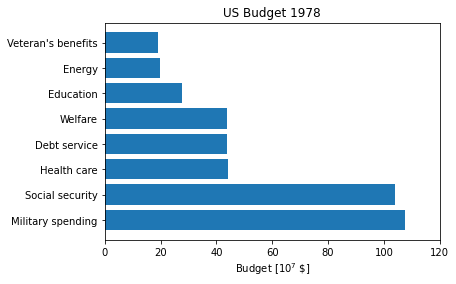

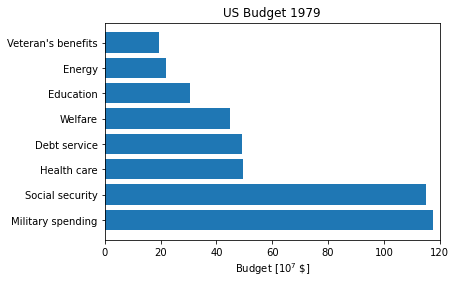

In [154]:
plot_budget(budget, str(1978))
plot_budget(budget, str(1979))

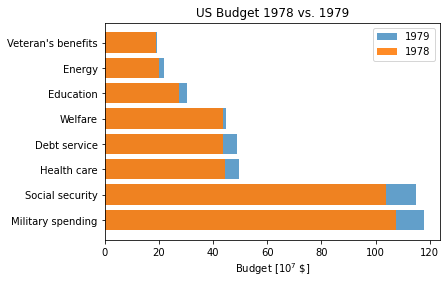

In [159]:
plt.barh(budget['Category'], budget['1979'], label = '1979', alpha = 0.7)
plt.barh(budget['Category'], budget['1978'], label = '1978', alpha = 0.9)

plt.title(f'US Budget 1978 vs. 1979')
plt.xlabel('Budget [$10^7$ \$]')
plt.legend()
plt.show()

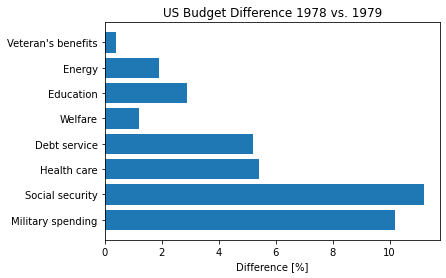

In [184]:
plt.barh(budget['Category'], budget['1979'] - budget['1978'])

plt.title(f'US Budget Difference 1978 vs. 1979')
plt.xlabel('Difference [%]')
plt.show()

In [185]:
budget['1978_perc'] = budget['1978'] / budget['1978'].sum() * 100
budget['1979_perc'] = budget['1979'] / budget['1979'].sum() * 100
budget

,Category,1978,1979,1978_perc,1979_perc
0,Military spending,107.6,117.8,26.269531,26.294643
1,Social security,103.9,115.1,25.366211,25.691964
2,Health care,44.3,49.7,10.815430,11.093750
3,Debt service,43.8,49.0,10.693359,10.937500
4,Welfare,43.7,44.9,10.668945,10.022321
5,Education,27.5,30.4,6.713867,6.785714
6,Energy,19.9,21.8,4.858398,4.866071
7,Veteran's benefits,18.9,19.3,4.614258,4.308036


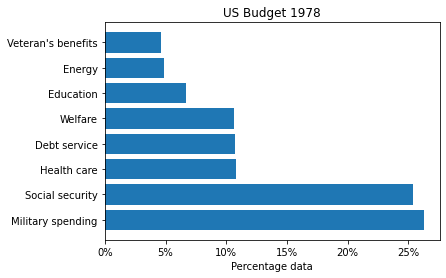

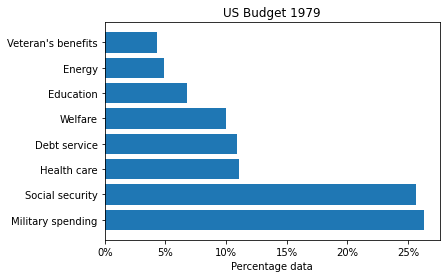

In [188]:
def plot_budget_perc_bar(budget, year_str):
    plt.barh(budget['Category'], budget[year_str + '_perc'])

    plt.xticks(range(0, 30, 5), [str(num) + '%' for num in list(range(0, 30, 5))])
    plt.title(f'US Budget {year_str}')
    plt.xlabel('Percentage data')
    plt.show()

plot_budget_perc_bar(budget, str(1978))
plot_budget_perc_bar(budget, str(1979))

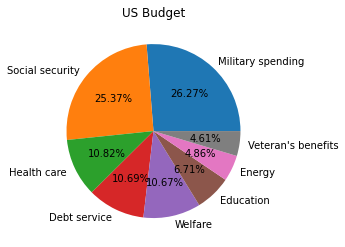

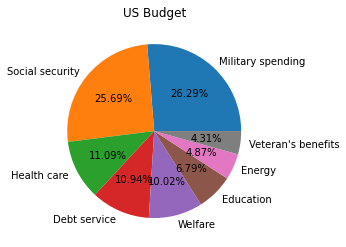

In [189]:
def plot_budget_perc_pie(budget, year_str):
    plt.pie(labels = budget['Category'], x = budget[year_str + '_perc'], autopct='%.2f%%')

    plt.title(f'US Budget')
    plt.show()

plot_budget_perc_pie(budget, str(1978))
plot_budget_perc_pie(budget, str(1979))

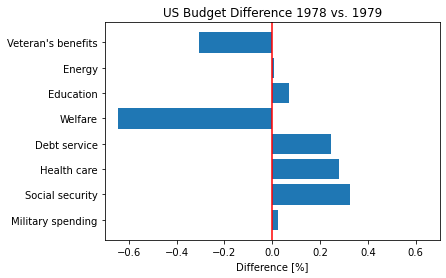

In [193]:
plt.barh(budget['Category'], budget['1979_perc'] - budget['1978_perc'])
plt.axvline(0, color = 'red')
plt.xlim(-0.7, 0.7)

plt.title(f'US Budget Difference 1978 vs. 1979')
plt.xlabel('Difference [%]')
plt.show()

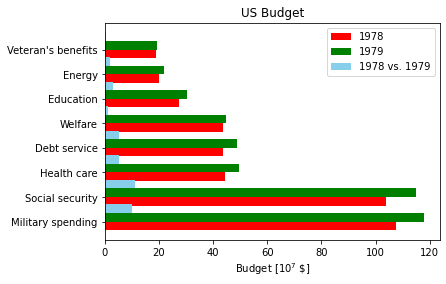

In [210]:
index = np.arange(8)
bar_width = 0.35

plt.barh(index, budget['1978'], bar_width, color = "red", label = "1978")
plt.barh(index+bar_width, budget['1979'], bar_width, color = "green", label = "1979")
plt.barh(index+bar_width+bar_width, budget['1979'] - budget['1978'], bar_width, color = "skyblue", label = "1978 vs. 1979")

plt.title('US Budget')
plt.xlabel('Budget [$10^7$ \$]')
plt.yticks(index + bar_width / 2, budget['Category'])
plt.legend()
plt.show()

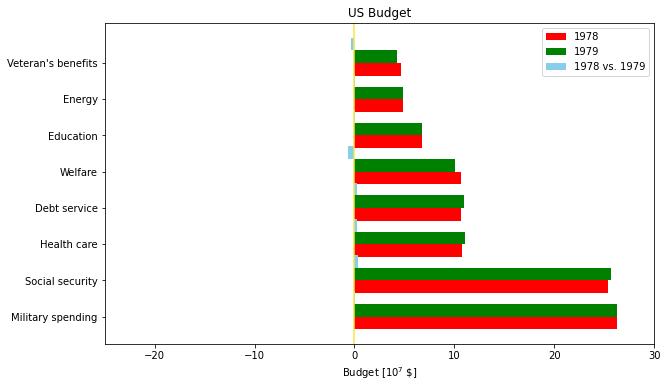

In [224]:
def cm_to_inch(value):
    return value/2.54

index = np.arange(8)
bar_width = 0.35

plt.figure(figsize=(cm_to_inch(25),cm_to_inch(15)))
plt.barh(index, budget['1978_perc'], bar_width, color = "red", label = "1978")
plt.barh(index+bar_width, budget['1979_perc'], bar_width, color = "green", label = "1979")
plt.barh(index+bar_width+bar_width, budget['1979_perc'] - budget['1978_perc'], bar_width, color = "skyblue", label = "1978 vs. 1979")

plt.axvline(0, color = '#f5e642')
plt.xlim(-25, 30, 5)
plt.title('US Budget')
plt.xlabel('Budget [$10^7$ \$]')
plt.yticks(index + bar_width / 2, budget['Category'])
plt.legend()
plt.show()

### Problem 3. Correlations between Variables. Alcohol and Tobacco Usage
The dataset `alcohol_tobacco.dat` shows the average weekly household spending, in British pounds, on tobacco products and alcoholic beverages for each of the 11 regions of Great Britain.

Create a scatter plot. Print the correlation coefficient. You can use the **correlation matrix** (find out how).

There's a major outlier. Which one is it?

Remove the outlier from the dataset (find out how). Calculate the correlation coefficient once again. It should be much higher.

This example is useful to show what an outlier is, and how an outlier can influence the results of an experiment.

**Note:** Be careful with outliers. Sometimes they indicate human error (e.g. human height 1588 cm is obviously wrong) but sometimes they indicate important patterns in the data. Should you remove, replace, or leave them is a difficult question and should be answered separately for each dataset.

In [225]:
alcohol_tobacco_usage = pd.read_table('data/alcohol_tobacco.dat')
alcohol_tobacco_usage

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East Midlands,4.89,3.34
4,West Midlands,5.63,3.47
5,East Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


In [226]:
alcohol_tobacco_usage.corr() # low correlation coefficient, probably there is outlier

,Alcohol,Tobacco
Alcohol,1.000000,0.223572
Tobacco,0.223572,1.000000


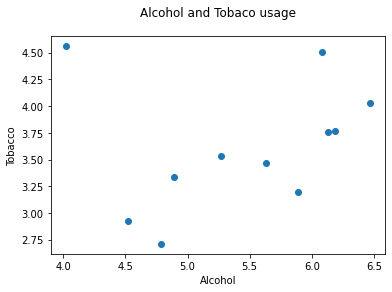

In [231]:
plt.scatter(alcohol_tobacco_usage['Alcohol'], alcohol_tobacco_usage['Tobacco'])

plt.title('Alcohol and Tobaco usage', pad = 20)
plt.xlabel('Alcohol')
plt.ylabel('Tobacco')
plt.show()

In [232]:
alcohol_tobacco_usage[alcohol_tobacco_usage['Alcohol'] < 4.2]

,Region,Alcohol,Tobacco
10,Northern Ireland,4.02,4.56


In [234]:
alcohol_tobacco_usage_without_NI = alcohol_tobacco_usage[alcohol_tobacco_usage['Region'] != 'Northern Ireland']
alcohol_tobacco_usage_without_NI

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East Midlands,4.89,3.34
4,West Midlands,5.63,3.47
5,East Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


In [236]:
alcohol_tobacco_usage_without_NI.corr()

,Alcohol,Tobacco
Alcohol,1.000000,0.784287
Tobacco,0.784287,1.000000


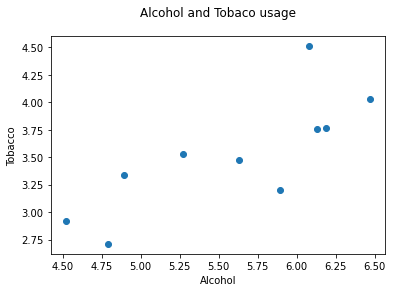

In [235]:
plt.scatter(alcohol_tobacco_usage_without_NI['Alcohol'], alcohol_tobacco_usage_without_NI['Tobacco'])

plt.title('Alcohol and Tobaco usage', pad = 20)
plt.xlabel('Alcohol')
plt.ylabel('Tobacco')
plt.show()

### Problem 4. Simulation
Another prediction technique based on statistics, is simulation. This means recreating a system's parameters and running the experiment on a computer instead of running it in real life. Simulation can give us many insights. It's useful for prediction, "what-if" analysis, etc. It's also very useful if we have very limited "real experimentation" resources and want to narrow down our possibilities.

Let's see how we can simulate the profit of a grocery shop.

The profit is dependent on the customers and what items they buy. Let's assume that the number of customers per months follows a normal distribution with mean 500 and standard deviation 20.

$$ C \sim N(500, 20) $$

In the shop, there are several items, each having a different popularity. The popularity represents the probability of buying each item.

| Item               | Price | Popularity |
|--------------------|-------|------------|
| Bread              | 0.99  | 0.5        |
| Milk               | 2.89  | 0.15       |
| Eggs, dozen        | 2.00  | 0.2        |
| Chicken fillet, kg | 6.39  | 0.15       |

Each customer buys *exactly one* article at random. Each customer will generate an expected profit equal to $\text{price} . \text{popularity}$. Total profit: sum of all profits.

In [237]:
def get_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return 0.99
    elif n < 0.65:
        return 2.89
    elif n <= 0.85:
        return 2
    else:
        return 6.39

In [238]:
days = 1000
def run_simulation():
    profits = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_customer_profit() for c in np.arange(customers)])
        profits.append(profit)
    return profits

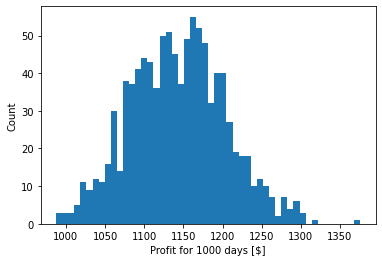

In [239]:
profits = run_simulation()
plt.hist(profits, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

Now we can answer questions like:
* What's the probability of profit less than \$1100? 
* What's the probability of profit between \$1300 and \$1400?

We can also change our model. Let's suppose now that one customer can take 1, 2 or 3 items, with probabilities 0.5, 0.3 and 0.2 respectively. The picked items are independent. How does this change the distribution?

In [240]:
def get_customer_profit_many_items(items = 1):
    customer_sum = sum([get_customer_profit() for i in range(items)])
    return customer_sum

def get_total_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return get_customer_profit_many_items(1)
    elif n <= 0.8:
        return get_customer_profit_many_items(2)
    else:
        return get_customer_profit_many_items(3)

In [241]:
def run_simulation_many_items():
    days = 1000
    profits_many_items = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_total_customer_profit() for c in np.arange(customers)])
        profits_many_items.append(profit)
    return profits_many_items

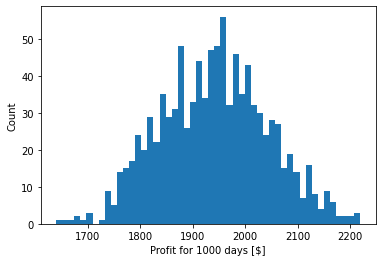

In [242]:
profits_many_items = run_simulation_many_items()
plt.hist(profits_many_items, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

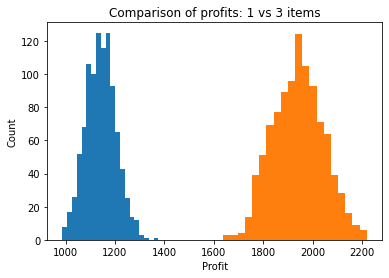

In [243]:
plt.title("Comparison of profits: 1 vs 3 items")
plt.hist(profits, bins = 20)
plt.hist(profits_many_items, bins = 20)
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()

### ** Problem 5. Monte Carlo Simulation
One common technique to apply simulations is called **Monte Carlo simulation**. It's similar to the simulation from the previous example. The main idea is to use random sampling to solve deterministic problems.

Research what these simulations are. Give examples. Implement at least one case of a Monte Carlo simulation. You can use the following checklist to help with your research and work:
* What is a simulation?
    * How is simulation used in science?
    * Why is a simulation useful?
* How are statistics useful in simulation? How can we simulate unknown, random processes?
* What is a Monte Carlo simulation (also known as "Monte Carlo method")?
* A common use of Monte Carlo methods is numeric integration
    * Define the problem. Propose the solution. Implement it and test with some common functions
    * How does this method compare to other methods, e.g. the trapezoidal rule? Compare the performance (accuracy and time to execute) of both methods
* Apply Monte Carlo simulation to a real-life system. There are many examples. You can see [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications) or some other resource for inspiration.

### ** Problem 6. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide:
* What is a data structure? 
* What is a probabilistic data structure?
    * Where does the probabilistic behaviour emerge?
    * What advantages do these structures provide?
* For your chosen structure, how is it constructed?
    * What parts do you need? What are the details?
* How does the structure work?
    * What operations can you do?
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g. Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)